In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
import seaborn as sns 

Reading Data 

In [21]:
df1 = pd.read_csv('2017_UA.csv')
df2 = pd.read_csv('2018_UA.csv')
df3 = pd.read_csv('2015_UA.csv')
df4 = pd.read_csv('2016_UA.csv')

In [22]:
df = pd.concat([df1, df2, df3, df4])

In [23]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

# Display

### Red: Column used in labels

### Blue: Column not used

In [30]:
df.head(5).style.set_table_styles({
    'OP_CARRIER': [{'selector': '', 'props': [('color', '#4FC0D0')]}],
    'Unnamed: 27': [{'selector': '', 'props': [('color', '#4FC0D0')]}],
    'ARR_DELAY': [{'selector': '', 'props': [('color', 'red')]}],
    'LATE_AIRCRAFT_DELAY': [{'selector': '', 'props': [('color', 'red')]}],
    'CARRIER_DELAY': [{'selector': '', 'props': [('color', 'red')]}],
    'WEATHER_DELAY': [{'selector': '', 'props': [('color', 'red')]}],
    'NAS_DELAY': [{'selector': '', 'props': [('color', 'red')]}],
    'SECURITY_DELAY': [{'selector': '', 'props': [('color', 'red')]}],
 }, overwrite=False)

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2017-01-01 00:00:00,UA,3,IAH,FLL,2000,2002.000000,2.000000,11.000000,2013.000000,2309.000000,3.000000,2324,2312.000000,-12.000000,0.000000,nan,0.000000,144.000000,130.000000,116.000000,966.000000,nan,nan,nan,nan,nan,nan
1,2017-01-01 00:00:00,UA,10,BNA,IAH,540,542.000000,2.000000,13.000000,555.000000,752.000000,5.000000,806,757.000000,-9.000000,0.000000,nan,0.000000,146.000000,135.000000,117.000000,657.000000,nan,nan,nan,nan,nan,nan
2,2017-01-01 00:00:00,UA,12,DEN,LAX,1905,1922.000000,17.000000,16.000000,1938.000000,2052.000000,8.000000,2035,2100.000000,25.000000,0.000000,nan,0.000000,150.000000,158.000000,134.000000,862.000000,17.000000,0.000000,8.000000,0.000000,0.000000,nan
3,2017-01-01 00:00:00,UA,14,HNL,EWR,1620,1625.000000,5.000000,16.000000,1641.000000,624.000000,19.000000,649,643.000000,-6.000000,0.000000,nan,0.000000,569.000000,558.000000,523.000000,4962.000000,nan,nan,nan,nan,nan,nan
4,2017-01-01 00:00:00,UA,15,EWR,HNL,845,914.000000,29.000000,21.000000,935.000000,1533.000000,6.000000,1511,1539.000000,28.000000,0.000000,nan,0.000000,686.000000,685.000000,658.000000,4962.000000,28.000000,0.000000,0.000000,0.000000,0.000000,nan


In [24]:
df = df.drop(['OP_CARRIER', 'Unnamed: 27'], axis=1)
df.head(5).style.set_table_styles({
    'ARR_DELAY': [{'selector': '', 'props': [('color', 'red')]}],
    'LATE_AIRCRAFT_DELAY': [{'selector': '', 'props': [('color', 'red')]}],
    'CARRIER_DELAY': [{'selector': '', 'props': [('color', 'red')]}],
    'WEATHER_DELAY': [{'selector': '', 'props': [('color', 'red')]}],
    'NAS_DELAY': [{'selector': '', 'props': [('color', 'red')]}],
    'SECURITY_DELAY': [{'selector': '', 'props': [('color', 'red')]}],
 }, overwrite=False)

,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2017-01-01 00:00:00,3,IAH,FLL,2000,2002.000000,2.000000,11.000000,2013.000000,2309.000000,3.000000,2324,2312.000000,-12.000000,0.000000,nan,0.000000,144.000000,130.000000,116.000000,966.000000,nan,nan,nan,nan,nan
1,2017-01-01 00:00:00,10,BNA,IAH,540,542.000000,2.000000,13.000000,555.000000,752.000000,5.000000,806,757.000000,-9.000000,0.000000,nan,0.000000,146.000000,135.000000,117.000000,657.000000,nan,nan,nan,nan,nan
2,2017-01-01 00:00:00,12,DEN,LAX,1905,1922.000000,17.000000,16.000000,1938.000000,2052.000000,8.000000,2035,2100.000000,25.000000,0.000000,nan,0.000000,150.000000,158.000000,134.000000,862.000000,17.000000,0.000000,8.000000,0.000000,0.000000
3,2017-01-01 00:00:00,14,HNL,EWR,1620,1625.000000,5.000000,16.000000,1641.000000,624.000000,19.000000,649,643.000000,-6.000000,0.000000,nan,0.000000,569.000000,558.000000,523.000000,4962.000000,nan,nan,nan,nan,nan
4,2017-01-01 00:00:00,15,EWR,HNL,845,914.000000,29.000000,21.000000,935.000000,1533.000000,6.000000,1511,1539.000000,28.000000,0.000000,nan,0.000000,686.000000,685.000000,658.000000,4962.000000,28.000000,0.000000,0.000000,0.000000,0.000000


In [32]:
df.dtypes

FL_DATE                datetime64[ns]
OP_CARRIER_FL_NUM               int64
ORIGIN                         object
DEST                           object
CRS_DEP_TIME                    int64
DEP_TIME                      float64
DEP_DELAY                     float64
TAXI_OUT                      float64
WHEELS_OFF                    float64
WHEELS_ON                     float64
TAXI_IN                       float64
CRS_ARR_TIME                    int64
ARR_TIME                      float64
ARR_DELAY                     float64
CANCELLED                     float64
CANCELLATION_CODE              object
DIVERTED                      float64
CRS_ELAPSED_TIME              float64
ACTUAL_ELAPSED_TIME           float64
AIR_TIME                      float64
DISTANCE                      float64
CARRIER_DELAY                 float64
WEATHER_DELAY                 float64
NAS_DELAY                     float64
SECURITY_DELAY                float64
LATE_AIRCRAFT_DELAY           float64
dtype: objec

In [33]:
df.isna().sum()

FL_DATE                      0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                 21893
DEP_DELAY                21893
TAXI_OUT                 22803
WHEELS_OFF               22803
WHEELS_ON                23588
TAXI_IN                  23588
CRS_ARR_TIME                 0
ARR_TIME                 23588
ARR_DELAY                28757
CANCELLED                    0
CANCELLATION_CODE      2243931
DIVERTED                     0
CRS_ELAPSED_TIME             0
ACTUAL_ELAPSED_TIME      28757
AIR_TIME                 28757
DISTANCE                     0
CARRIER_DELAY          1852050
WEATHER_DELAY          1852050
NAS_DELAY              1852050
SECURITY_DELAY         1852050
LATE_AIRCRAFT_DELAY    1852050
dtype: int64

In [25]:
df = df.fillna(0)

In [35]:
df.shape    

(2266836, 26)

In [26]:
use_cols = ['FL_DATE', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
df = df[use_cols].copy()

In [37]:
cancelled = df[df['CANCELLED']==1]
cancelled.tail()

,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
536857,2016-12-26,698,SFO,ORD,1335,0.0,0.0,0.0,0.0,0.0,0.0,1953,0.0,0.0,1.0,A,0.0,258.0,0.0,0.0,1846.0,0.0,0.0,0.0,0.0,0.0
537006,2016-12-26,841,SJU,ORD,1510,0.0,0.0,0.0,0.0,0.0,0.0,1810,0.0,0.0,1.0,C,0.0,300.0,0.0,0.0,2072.0,0.0,0.0,0.0,0.0,0.0
537176,2016-12-26,1177,OGG,SFO,1217,0.0,0.0,0.0,0.0,0.0,0.0,1918,0.0,0.0,1.0,A,0.0,301.0,0.0,0.0,2338.0,0.0,0.0,0.0,0.0,0.0
537208,2016-12-26,1224,LAX,HNL,1055,0.0,0.0,0.0,0.0,0.0,0.0,1516,0.0,0.0,1.0,A,0.0,381.0,0.0,0.0,2556.0,0.0,0.0,0.0,0.0,0.0
544923,2016-12-31,709,PIT,DEN,1611,0.0,0.0,0.0,0.0,0.0,0.0,1752,0.0,0.0,1.0,A,0.0,221.0,0.0,0.0,1290.0,0.0,0.0,0.0,0.0,0.0


In [38]:
#DEP_TIME, DEP_DELAY, TAXI_OUT , WHEELS_OFF , WHEELS_ON , TAXI_IN , ARR_TIME, ARR_DELAY, CANCELLATION_CODE, ACTUAL_ELAPSED_TIME, AIR_TIME, CARRIER_DELAY , WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY\
cancelled.head(5).style.set_table_styles({
    'DEP_TIME': [{'selector': '', 'props': [('color', '#8EAC50')]}],
    'DEP_DELAY': [{'selector': '', 'props': [('color', '#8EAC50')]}],
    'TAXI_OUT': [{'selector': '', 'props': [('color', '#8EAC50')]}],
    'WHEELS_OFF': [{'selector': '', 'props': [('color', '#8EAC50')]}],
    'WHEELS_ON': [{'selector': '', 'props': [('color', '#8EAC50')]}],
    'TAXI_IN': [{'selector': '', 'props': [('color', '#8EAC50')]}],
    'ARR_TIME': [{'selector': '', 'props': [('color', '#8EAC50')]}],
    'ARR_DELAY': [{'selector': '', 'props': [('color', '#8EAC50')]}],
    'CANCELLATION_CODE': [{'selector': '', 'props': [('color', '#8EAC50')]}],
    'ACTUAL_ELAPSED_TIME': [{'selector': '', 'props': [('color', '#8EAC50')]}],
    'AIR_TIME': [{'selector': '', 'props': [('color', '#8EAC50')]}],
    'WEATHER_DELAY': [{'selector': '', 'props': [('color', '#8EAC50')]}],
    'SECURITY_DELAY': [{'selector': '', 'props': [('color', '#8EAC50')]}],
    'LATE_AIRCRAFT_DELAY': [{'selector': '', 'props': [('color', '#8EAC50')]}]
 }, overwrite=False)

,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
1650,2017-01-02 00:00:00,325,IAD,LAX,1715,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1947,0.000000,0.000000,1.000000,A,0.000000,332.000000,0.000000,0.000000,2288.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1748,2017-01-02 00:00:00,408,SFO,IAD,730,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1519,0.000000,0.000000,1.000000,A,0.000000,289.000000,0.000000,0.000000,2419.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2360,2017-01-02 00:00:00,1125,IAH,EWR,1555,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020,0.000000,0.000000,1.000000,A,0.000000,205.000000,0.000000,0.000000,1400.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2761,2017-01-02 00:00:00,1803,SJU,EWR,158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,503,0.000000,0.000000,1.000000,A,0.000000,245.000000,0.000000,0.000000,1608.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2807,2017-01-02 00:00:00,1844,SFO,ATL,2255,3.000000,68.000000,0.000000,0.000000,0.000000,0.000000,633,0.000000,0.000000,1.000000,A,0.000000,278.000000,0.000000,0.000000,2139.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [39]:
days_month_cancelled = pd.DataFrame()
days_month_cancelled['FL_DATE'] = cancelled['FL_DATE']
days_month_cancelled['day'] = days_month_cancelled['FL_DATE'].dt.day_name()
days_month_cancelled['month'] = days_month_cancelled['FL_DATE'].dt.month

In [40]:
days_month_cancelled['day'].value_counts()
#perc_days_cancelled.groupby('day').count()

day
Monday       4594
Tuesday      3834
Wednesday    3544
Thursday     3120
Sunday       2945
Friday       2654
Saturday     2214
Name: count, dtype: int64

In [41]:
days_month_total = pd.DataFrame()
days_month_total['FL_DATE'] = df['FL_DATE']
days_month_total['day'] = days_month_total['FL_DATE'].dt.day_name()
days_month_total['month'] = days_month_total['FL_DATE'].dt.month
days_month_total.reset_index(drop=True)

,FL_DATE,day,month
0,2017-01-01,Sunday,1
1,2017-01-01,Sunday,1
2,2017-01-01,Sunday,1
3,2017-01-01,Sunday,1
4,2017-01-01,Sunday,1
...,...,...,...
2266831,2016-12-31,Saturday,12
2266832,2016-12-31,Saturday,12
2266833,2016-12-31,Saturday,12
2266834,2016-12-31,Saturday,12


# Chart

[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

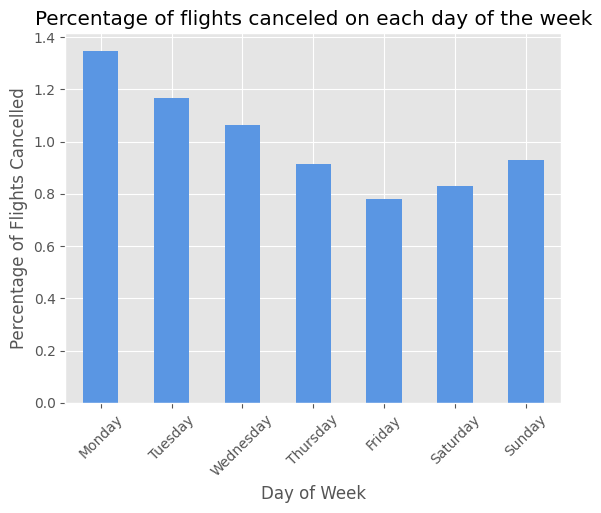

In [42]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_frac  = (days_month_cancelled['day'].value_counts()/ days_month_total['day'].value_counts())*100
days_frac = days_frac.reindex(day_order)

ax = days_frac.plot(kind='bar', title='Percentage of flights canceled on each day of the week', color='#5A96E3', ylabel='Percentage of Flights Cancelled', xlabel='Day of Week')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10'),
 Text(10, 0, '11'),
 Text(11, 0, '12')]

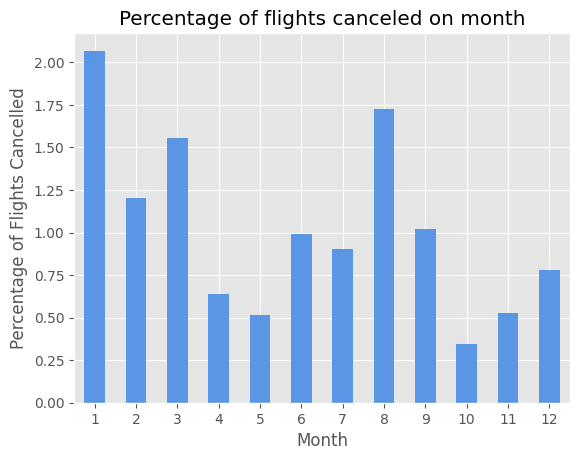

In [43]:
month_frac  = (days_month_cancelled['month'].value_counts()/ days_month_total['month'].value_counts())*100

ax = month_frac.plot(kind='bar', title='Percentage of flights canceled on month', color='#5A96E3', ylabel='Percentage of Flights Cancelled', xlabel='Month')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

In [44]:
perc_dayofweek_month = (days_month_cancelled[['day', 'month']].value_counts()/days_month_total[['day', 'month']].value_counts())*100
perc_df = perc_dayofweek_month.reset_index(name='perc_dayofweek_month')
perc_df

,day,month,perc_dayofweek_month
0,Friday,1,1.532358
1,Friday,2,0.462924
2,Friday,3,0.788261
3,Friday,4,0.434395
4,Friday,5,0.579595
...,...,...,...
79,Wednesday,8,1.862846
80,Wednesday,9,0.414049
81,Wednesday,10,0.222137
82,Wednesday,11,0.338540


/tmp/ipykernel_1048/708233541.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_daysofweek_month['dayofweek'] = plot_daysofweek_month['day'].map(day_map)


[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

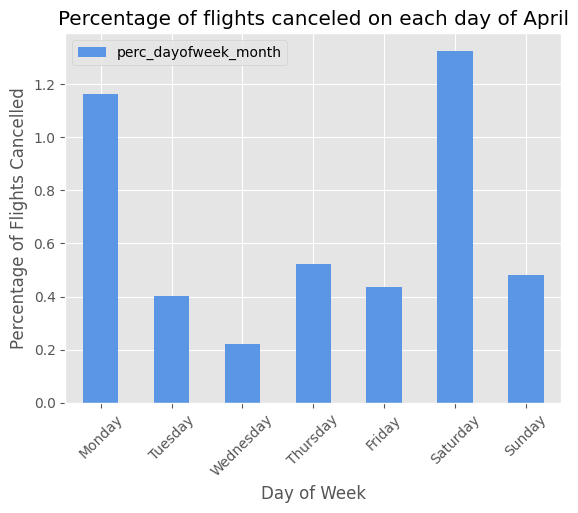

In [45]:
day_map = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
plot_daysofweek_month = perc_df[perc_df['month'] == 4]
plot_daysofweek_month['dayofweek'] = plot_daysofweek_month['day'].map(day_map)
plot_daysofweek_month = plot_daysofweek_month.sort_values(by='dayofweek')
plot_daysofweek_month

ax = plot_daysofweek_month.plot(kind='bar', title='Percentage of flights canceled on each day of April', color='#5A96E3', ylabel='Percentage of Flights Cancelled', xlabel='Day of Week', x='day', y='perc_dayofweek_month')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

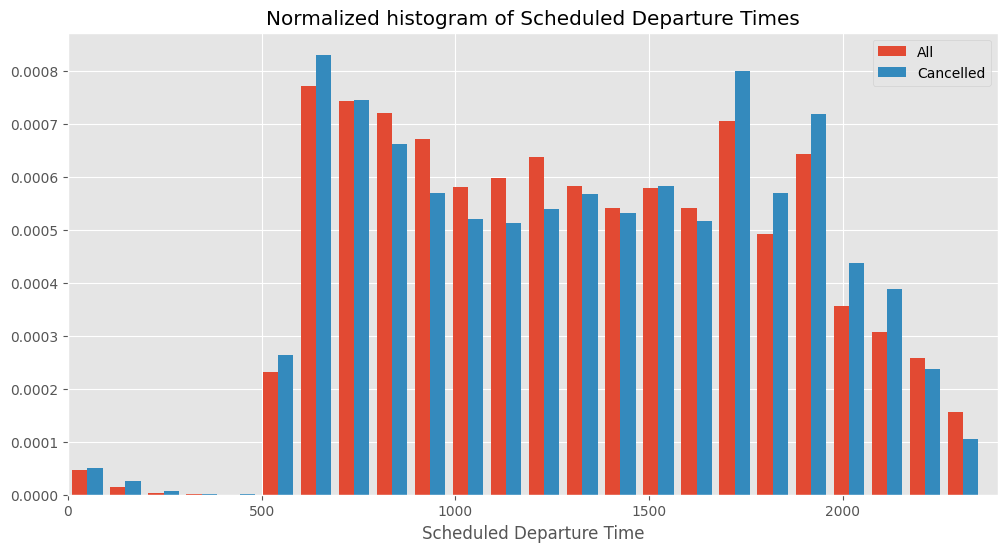

In [46]:
fig, ax = plt.subplots(figsize = (12,6))

ax.hist([df['CRS_DEP_TIME'], cancelled['CRS_DEP_TIME']], density=True, bins=24, label=['All', 'Cancelled'])

ax.set_xlim(0,2400)

ax.set_xlabel('Scheduled Departure Time')
ax.set_title('Normalized histogram of Scheduled Departure Times')

plt.legend()
plt.show()


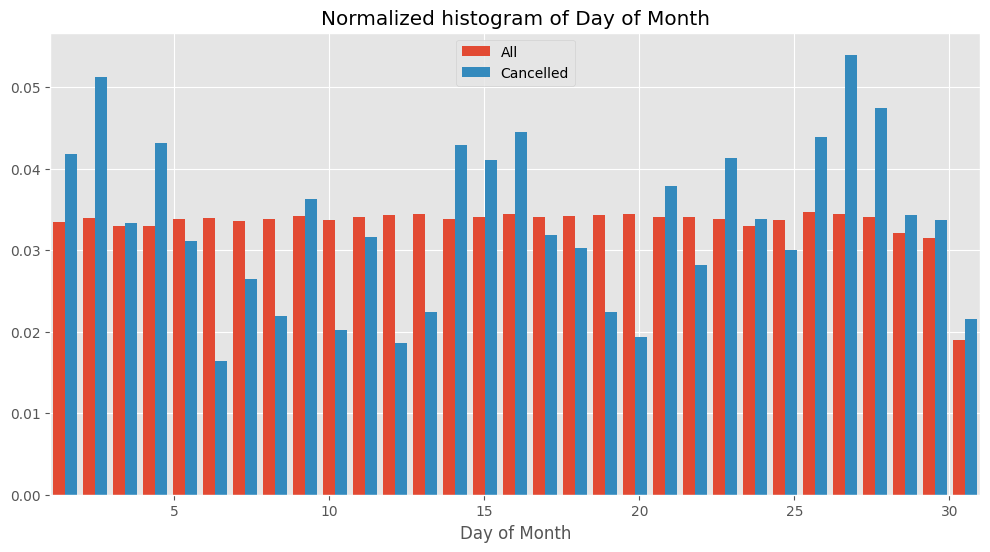

In [47]:

fig, ax = plt.subplots(figsize = (12,6))

ax.hist([df['FL_DATE'].dt.day, cancelled['FL_DATE'].dt.day], density=True, bins=31, label=['All', 'Cancelled'])

ax.set_xlim(1,31)
ax.set_xlabel('Day of Month')
ax.set_title('Normalized histogram of Day of Month')

plt.legend()
plt.show()


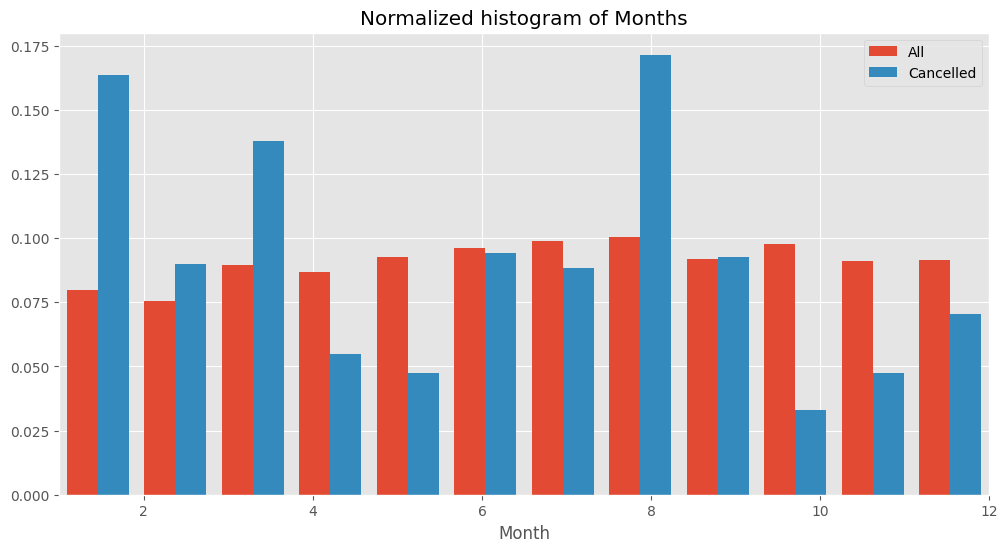

In [48]:

fig, ax = plt.subplots(figsize = (12,6))

ax.hist([df['FL_DATE'].dt.month, cancelled['FL_DATE'].dt.month], density=True, bins=12, label=['All', 'Cancelled'])

ax.set_xlim(1,12)
ax.set_xlabel('Month')
ax.set_title('Normalized histogram of Months')

plt.legend()
plt.show()


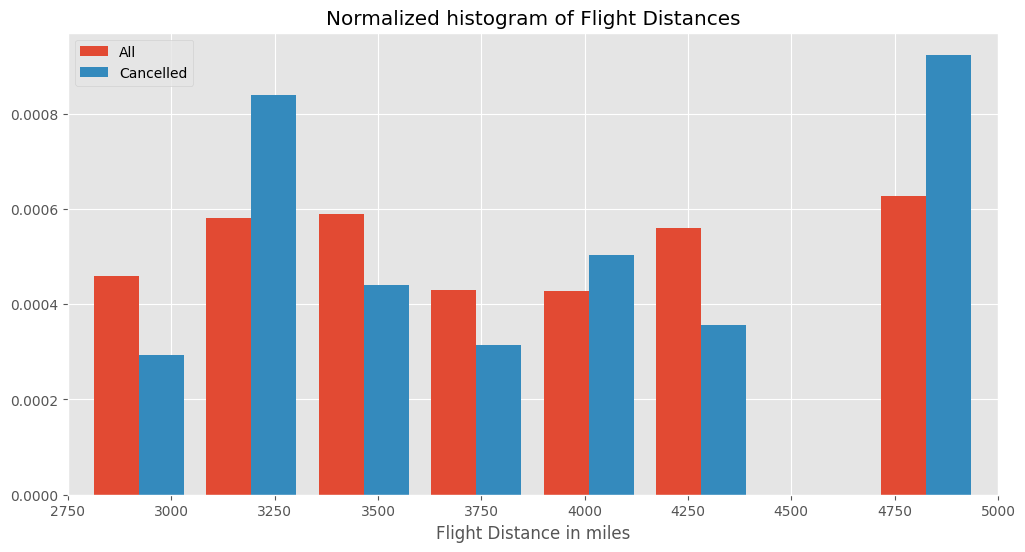

In [49]:
fig, ax = plt.subplots(figsize = (12,6))

ax.hist([df[df['DISTANCE'] > 2750]['DISTANCE'], cancelled[cancelled['DISTANCE'] > 2750]['DISTANCE']], density=True, bins=8, label=['All', 'Cancelled'])

ax.set_xlim(2750, 5000)
ax.set_xlabel('Flight Distance in miles')
ax.set_title('Normalized histogram of Flight Distances')

plt.legend()
plt.show()


In [50]:
df[df['TAXI_OUT'].isna() == True].reset_index()

,index,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY


In [51]:
cancelled.reset_index(drop=True)

,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2017-01-02,325,IAD,LAX,1715,0.0,0.0,0.0,0.0,0.0,0.0,1947,0.0,0.0,1.0,A,0.0,332.0,0.0,0.0,2288.0,0.0,0.0,0.0,0.0,0.0
1,2017-01-02,408,SFO,IAD,730,0.0,0.0,0.0,0.0,0.0,0.0,1519,0.0,0.0,1.0,A,0.0,289.0,0.0,0.0,2419.0,0.0,0.0,0.0,0.0,0.0
2,2017-01-02,1125,IAH,EWR,1555,0.0,0.0,0.0,0.0,0.0,0.0,2020,0.0,0.0,1.0,A,0.0,205.0,0.0,0.0,1400.0,0.0,0.0,0.0,0.0,0.0
3,2017-01-02,1803,SJU,EWR,158,0.0,0.0,0.0,0.0,0.0,0.0,503,0.0,0.0,1.0,A,0.0,245.0,0.0,0.0,1608.0,0.0,0.0,0.0,0.0,0.0
4,2017-01-02,1844,SFO,ATL,2255,3.0,68.0,0.0,0.0,0.0,0.0,633,0.0,0.0,1.0,A,0.0,278.0,0.0,0.0,2139.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22900,2016-12-26,698,SFO,ORD,1335,0.0,0.0,0.0,0.0,0.0,0.0,1953,0.0,0.0,1.0,A,0.0,258.0,0.0,0.0,1846.0,0.0,0.0,0.0,0.0,0.0
22901,2016-12-26,841,SJU,ORD,1510,0.0,0.0,0.0,0.0,0.0,0.0,1810,0.0,0.0,1.0,C,0.0,300.0,0.0,0.0,2072.0,0.0,0.0,0.0,0.0,0.0
22902,2016-12-26,1177,OGG,SFO,1217,0.0,0.0,0.0,0.0,0.0,0.0,1918,0.0,0.0,1.0,A,0.0,301.0,0.0,0.0,2338.0,0.0,0.0,0.0,0.0,0.0
22903,2016-12-26,1224,LAX,HNL,1055,0.0,0.0,0.0,0.0,0.0,0.0,1516,0.0,0.0,1.0,A,0.0,381.0,0.0,0.0,2556.0,0.0,0.0,0.0,0.0,0.0


In [52]:
df.loc[df.duplicated(subset=['FL_DATE', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST'])]

,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY


Histogram of Taxi-Out times

We can see here that many flights are cancelled before the plane has a chance to taxi-out to the runway.

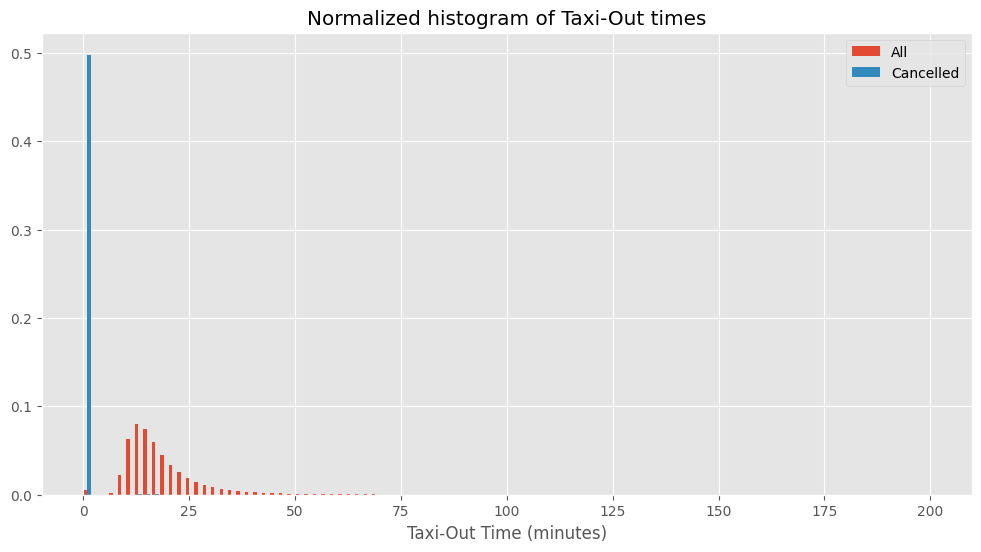

In [53]:
fig, ax = plt.subplots(figsize = (12,6))

ax.hist([df['TAXI_OUT'], cancelled['TAXI_OUT']], density=True, bins=100, label=['All', 'Cancelled'])

ax.set_xlabel('Taxi-Out Time (minutes)')
ax.set_title('Normalized histogram of Taxi-Out times')

plt.legend()
plt.show()


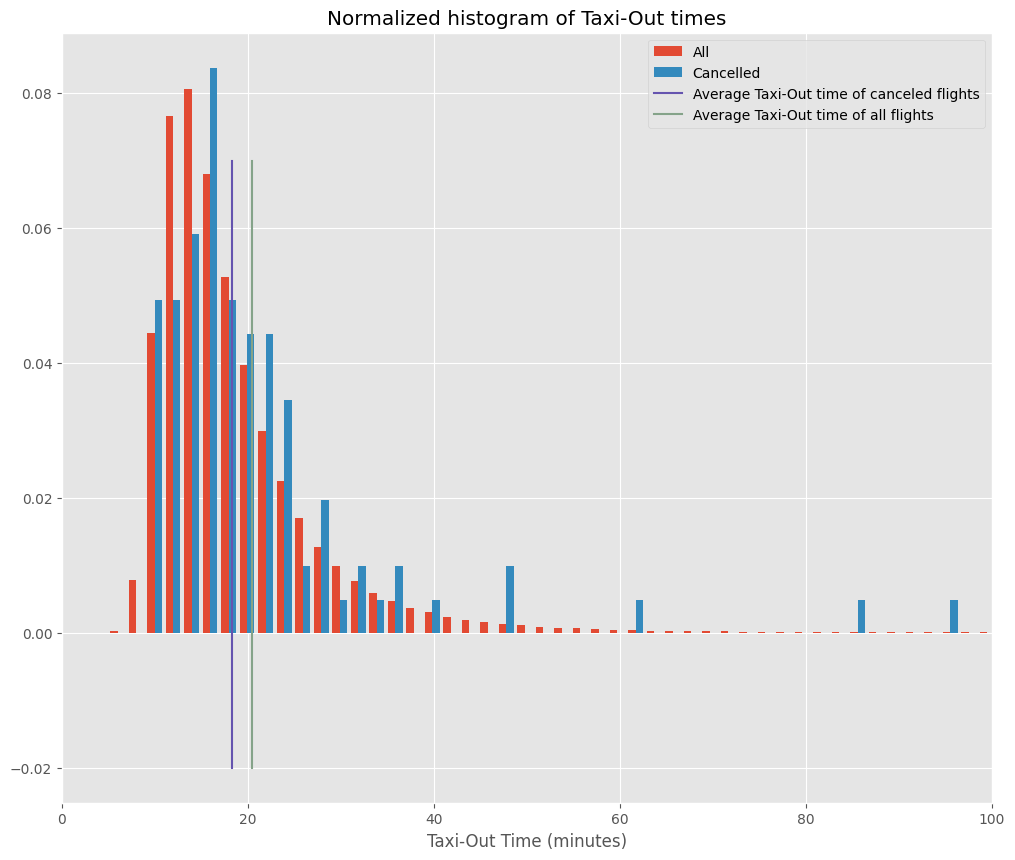

In [54]:
fig, ax = plt.subplots(figsize = (12,10))
x = df['TAXI_OUT'][df['TAXI_OUT'] > 0]
y = cancelled['TAXI_OUT'][cancelled['TAXI_OUT'] > 0]
x_mean = np.mean(x)
y_mean = np.mean(y)

ax.hist([x, y], density=True, bins=100, label=['All', 'Cancelled'])
ax.plot([x_mean, x_mean],[-0.02,0.07],color='#6554AF', label='Average Taxi-Out time of canceled flights')
ax.plot([y_mean, y_mean],[-0.02,0.07],color='#85A389', label='Average Taxi-Out time of all flights')

ax.set_xlim(0,100)
ax.set_xlabel('Taxi-Out Time (minutes)')
ax.set_title('Normalized histogram of Taxi-Out times')

plt.legend()
plt.show()


# Chart Delay

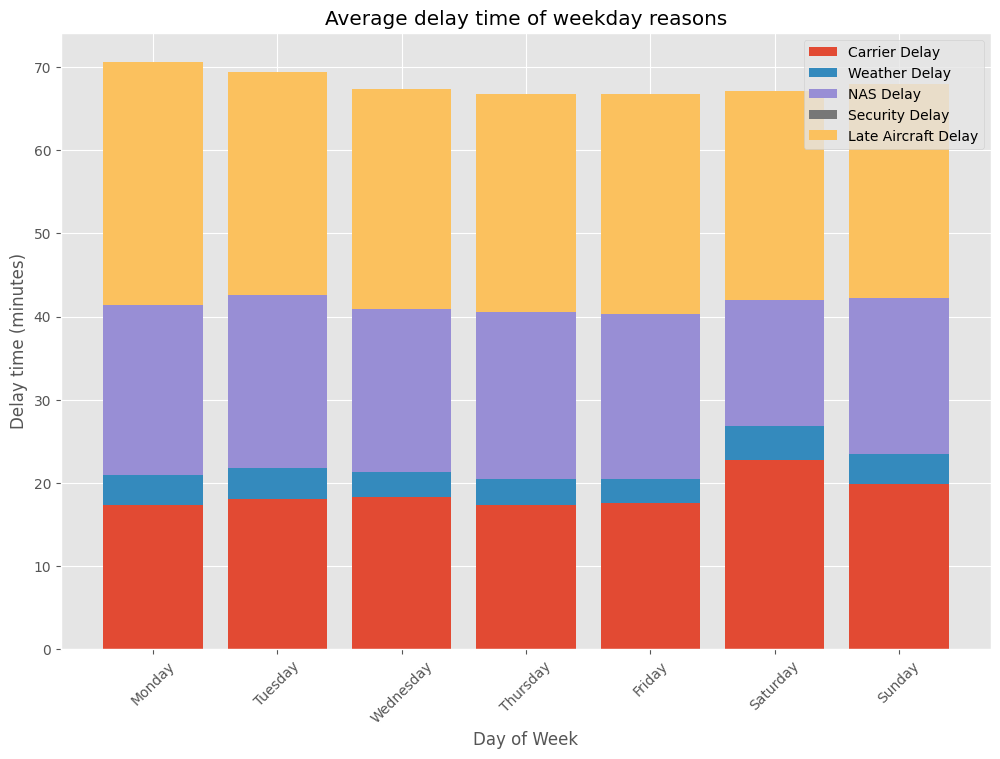

In [55]:
df['total_delay'] = (df['CARRIER_DELAY'] + df['WEATHER_DELAY']
             + df['NAS_DELAY'] + df['SECURITY_DELAY'] + df['LATE_AIRCRAFT_DELAY'])
df_delayed = df[df['total_delay'] != 0]
carrier_group = df_delayed['CARRIER_DELAY'].groupby(df_delayed['FL_DATE'].dt.dayofweek).mean()
weather_group = df_delayed['WEATHER_DELAY'].groupby(df_delayed['FL_DATE'].dt.dayofweek).mean()
nas_group = df_delayed['NAS_DELAY'].groupby(df_delayed['FL_DATE'].dt.dayofweek).mean()
security_group = df_delayed['SECURITY_DELAY'].groupby(df_delayed['FL_DATE'].dt.dayofweek).mean()
late_group = df_delayed['LATE_AIRCRAFT_DELAY'].groupby(df_delayed['FL_DATE'].dt.dayofweek).mean()

w_bottom = carrier_group.values
n_bottom = w_bottom + weather_group.values
s_bottom = n_bottom + nas_group.values
l_bottom = s_bottom + security_group.values

day_map = {0: 'Monday', 1: 'Tuesday',2: 'Wednesday',3: 'Thursday',4: 'Friday', 5: 'Saturday', 6:'Sunday'}
x = carrier_group.index.map(day_map)

fig, ax = plt.subplots(figsize = (12,8))

ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 45)
ax.bar(np.arange(len(x)),carrier_group.values, align='center', label='Carrier Delay')
ax.bar(np.arange(len(x)),weather_group.values, align='center', bottom=w_bottom, label='Weather Delay')
ax.bar(np.arange(len(x)),nas_group.values, align='center', bottom=n_bottom, label='NAS Delay')
ax.bar(np.arange(len(x)),security_group.values, align='center', bottom=s_bottom, label='Security Delay')
ax.bar(np.arange(len(x)),late_group.values, align='center', bottom=l_bottom, label='Late Aircraft Delay')

ax.set_xlabel('Day of Week')
ax.set_ylabel('Delay time (minutes)')
ax.set_title('Average delay time of weekday reasons')

plt.legend()
plt.show()

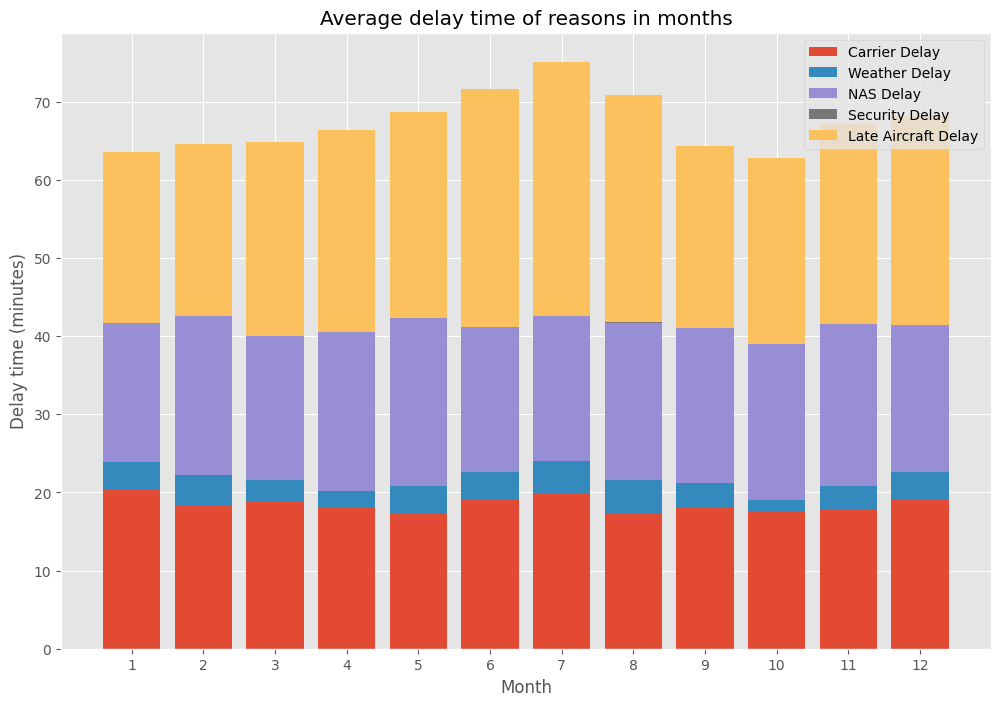

In [56]:
df['total_delay'] = (df['CARRIER_DELAY'] + df['WEATHER_DELAY']
             + df['NAS_DELAY'] + df['SECURITY_DELAY'] + df['LATE_AIRCRAFT_DELAY'])
df_delayed = df[df['total_delay'] != 0]
carrier_group = df_delayed['CARRIER_DELAY'].groupby(df_delayed['FL_DATE'].dt.month).mean()
weather_group = df_delayed['WEATHER_DELAY'].groupby(df_delayed['FL_DATE'].dt.month).mean()
nas_group = df_delayed['NAS_DELAY'].groupby(df_delayed['FL_DATE'].dt.month).mean()
security_group = df_delayed['SECURITY_DELAY'].groupby(df_delayed['FL_DATE'].dt.month).mean()
late_group = df_delayed['LATE_AIRCRAFT_DELAY'].groupby(df_delayed['FL_DATE'].dt.month).mean()

w_bottom = carrier_group.values
n_bottom = w_bottom + weather_group.values
s_bottom = n_bottom + nas_group.values
l_bottom = s_bottom + security_group.values

x = carrier_group.index.values

fig, ax = plt.subplots(figsize = (12,8))

ax.set_xticks(np.arange(1, len(x) + 1))
ax.bar(np.arange(1, len(x)+1),carrier_group.values, align='center', label='Carrier Delay')
ax.bar(np.arange(1, len(x)+1),weather_group.values, align='center', bottom=w_bottom, label='Weather Delay')
ax.bar(np.arange(1, len(x)+1),nas_group.values, align='center', bottom=n_bottom, label='NAS Delay')
ax.bar(np.arange(1, len(x)+1),security_group.values, align='center', bottom=s_bottom, label='Security Delay')
ax.bar(np.arange(1, len(x)+1),late_group.values, align='center', bottom=l_bottom, label='Late Aircraft Delay')

ax.set_xlabel('Month')
ax.set_ylabel('Delay time (minutes)')
ax.set_title('Average delay time of reasons in months')
plt.legend()
plt.show()

In [57]:
carrier_group.values

array([20.29263633, 18.21010749, 18.86345394, 17.97214475, 17.20421677,
       19.0926136 , 19.77046608, 17.2521891 , 18.19224579, 17.45459363,
       17.78343179, 19.03161324])

# Total number of flights

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10'),
 Text(10, 0, '11'),
 Text(11, 0, '12')]

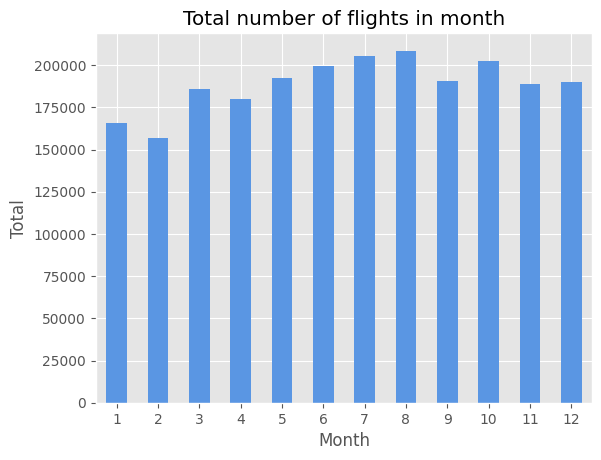

In [58]:
ax = df['FL_DATE'].dt.month.value_counts().sort_index().plot(kind='bar', title='Total number of flights in month', color='#5A96E3', ylabel='Total', xlabel='Month')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

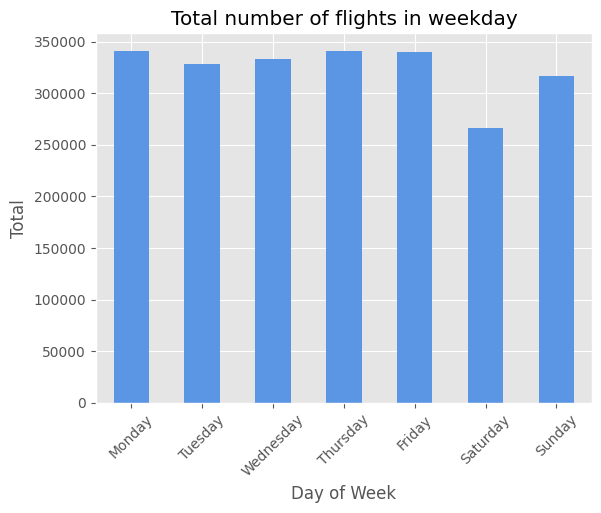

In [59]:
day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = df['FL_DATE'].dt.weekday.value_counts().sort_index().plot(kind='bar', title='Total number of flights in weekday', color='#5A96E3', ylabel='Total', xlabel='Day of Week')
ax.set_xticklabels(day, rotation=45)

In [60]:
ax = df['FL_DATE'].dt.dayofweek.value_counts().sort_index()
ax

FL_DATE
0    341084
1    328119
2    333472
3    340991
4    340188
5    266190
6    316792
Name: count, dtype: int64

# Reasons flights cancellations

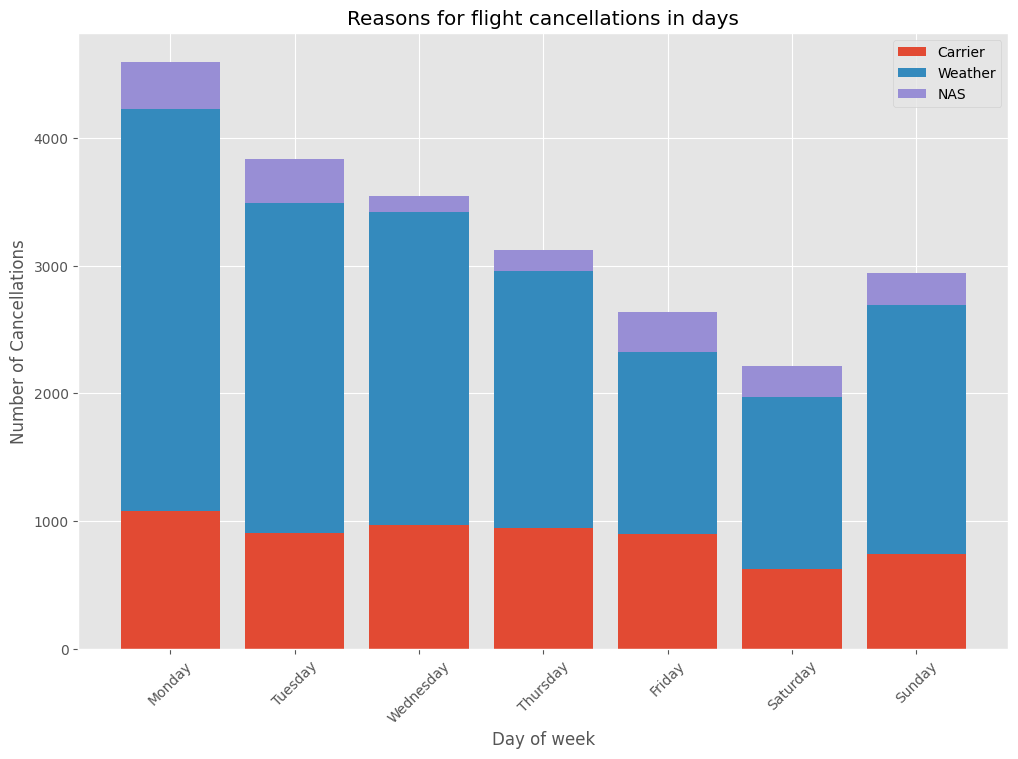

In [61]:
cancelled_group = cancelled['CANCELLATION_CODE'].groupby(cancelled['FL_DATE'].dt.weekday).value_counts().sort_index()

b_bottom = cancelled_group.loc[:,'A'].values
c_bottom = b_bottom + cancelled_group.loc[:,'B'].values
d_bottom = c_bottom + cancelled_group.loc[:,'B'].values

day_map = {0: 'Monday', 1: 'Tuesday',2: 'Wednesday',3: 'Thursday',4: 'Friday', 5: 'Saturday', 6:'Sunday'}
x = cancelled_group.loc[:,'A'].index.map(day_map)

fig, ax = plt.subplots(figsize = (12,8))
ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 45)

ax.bar(np.arange(len(x)),cancelled_group.loc[:,'A'].values, align='center', label='Carrier')
ax.bar(np.arange(len(x)),cancelled_group.loc[:,'B'].values, align='center', bottom=b_bottom, label='Weather')
ax.bar(np.arange(len(x)),cancelled_group.loc[:,'C'].values, align='center', bottom=c_bottom, label='NAS')
#ax.bar(np.arange(len(x)),cancelled_group.loc[:,'D'].values, align='center', bottom=d_bottom, label='Security')

ax.set_xlabel('Day of week')
ax.set_ylabel('Number of Cancellations')
ax.set_title('Reasons for flight cancellations in days')
plt.legend()
plt.show()


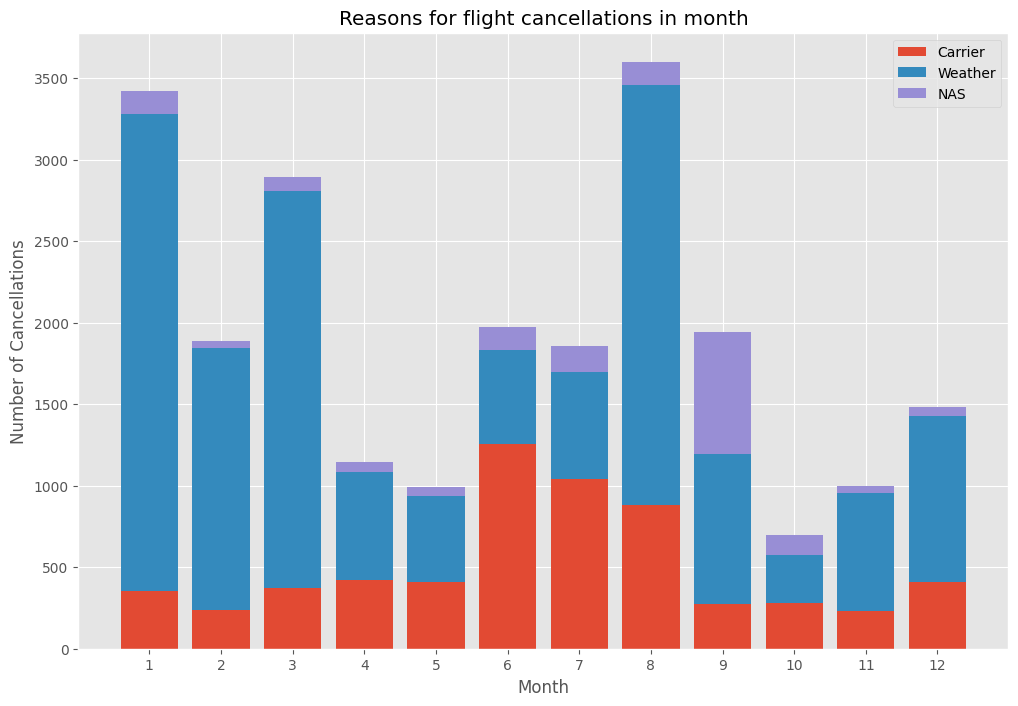

In [62]:
cancelled_group = cancelled['CANCELLATION_CODE'].groupby(cancelled['FL_DATE'].dt.month).value_counts().sort_index()

b_bottom = cancelled_group.loc[:,'A'].values
c_bottom = b_bottom + cancelled_group.loc[:,'B'].values
d_bottom = c_bottom + cancelled_group.loc[:,'B'].values

x = cancelled_group.loc[:,'A'].index.values

fig, ax = plt.subplots(figsize = (12,8))
ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 0)

ax.bar(np.arange(len(x)),cancelled_group.loc[:,'A'].values, align='center', label='Carrier')
ax.bar(np.arange(len(x)),cancelled_group.loc[:,'B'].values, align='center', bottom=b_bottom, label='Weather')
ax.bar(np.arange(len(x)),cancelled_group.loc[:,'C'].values, align='center', bottom=c_bottom, label='NAS')
#ax.bar(np.arange(len(x)),cancelled_group.loc[:,'D'].values, align='center', bottom=d_bottom, label='Security')

ax.set_xlabel('Month')
ax.set_ylabel('Number of Cancellations')
ax.set_title('Reasons for flight cancellations in month')
plt.legend()
plt.show()


In [63]:
cancelled['ORIGIN'].value_counts()

ORIGIN
EWR    3103
IAH    2926
ORD    2899
DEN    1572
SFO    1344
       ... 
MSO       2
MAF       2
ELP       1
BGR       1
BTR       1
Name: count, Length: 113, dtype: int64

# Top 20 destinations/departure cancellations

<Axes: title={'center': 'Top 20 destinations with the most cancellations'}, xlabel='Destinations', ylabel='Cancelled'>

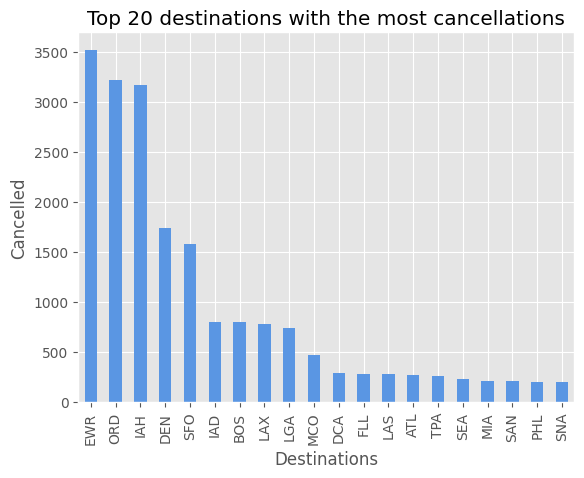

In [64]:
cancelled['DEST'].value_counts().head(20).plot(kind='bar', title='Top 20 destinations with the most cancellations', color='#5A96E3', ylabel='Cancelled', xlabel='Destinations')

<Axes: title={'center': 'Top 20 departure points with the most cancellations'}, xlabel='ORIGIN', ylabel='Cancelled'>

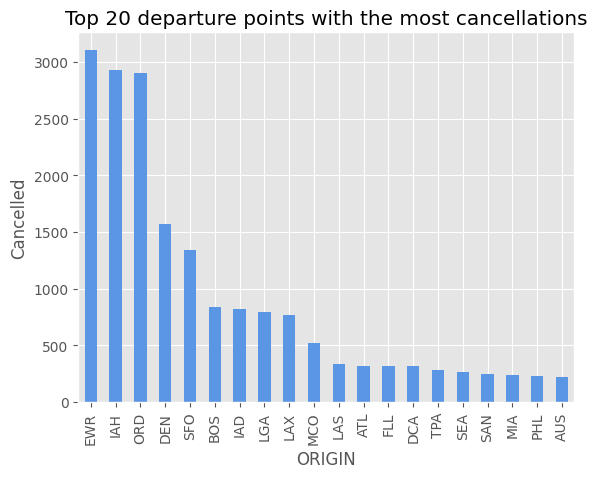

In [65]:
cancelled['ORIGIN'].value_counts().head(20).plot(kind='bar', title='Top 20 departure points with the most cancellations', color='#5A96E3', ylabel='Cancelled', xlabel='ORIGIN')

In [66]:
cancelled

,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
1650,2017-01-02,325,IAD,LAX,1715,0.0,0.0,0.0,0.0,0.0,0.0,1947,0.0,0.0,1.0,A,0.0,332.0,0.0,0.0,2288.0,0.0,0.0,0.0,0.0,0.0
1748,2017-01-02,408,SFO,IAD,730,0.0,0.0,0.0,0.0,0.0,0.0,1519,0.0,0.0,1.0,A,0.0,289.0,0.0,0.0,2419.0,0.0,0.0,0.0,0.0,0.0
2360,2017-01-02,1125,IAH,EWR,1555,0.0,0.0,0.0,0.0,0.0,0.0,2020,0.0,0.0,1.0,A,0.0,205.0,0.0,0.0,1400.0,0.0,0.0,0.0,0.0,0.0
2761,2017-01-02,1803,SJU,EWR,158,0.0,0.0,0.0,0.0,0.0,0.0,503,0.0,0.0,1.0,A,0.0,245.0,0.0,0.0,1608.0,0.0,0.0,0.0,0.0,0.0
2807,2017-01-02,1844,SFO,ATL,2255,3.0,68.0,0.0,0.0,0.0,0.0,633,0.0,0.0,1.0,A,0.0,278.0,0.0,0.0,2139.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536857,2016-12-26,698,SFO,ORD,1335,0.0,0.0,0.0,0.0,0.0,0.0,1953,0.0,0.0,1.0,A,0.0,258.0,0.0,0.0,1846.0,0.0,0.0,0.0,0.0,0.0
537006,2016-12-26,841,SJU,ORD,1510,0.0,0.0,0.0,0.0,0.0,0.0,1810,0.0,0.0,1.0,C,0.0,300.0,0.0,0.0,2072.0,0.0,0.0,0.0,0.0,0.0
537176,2016-12-26,1177,OGG,SFO,1217,0.0,0.0,0.0,0.0,0.0,0.0,1918,0.0,0.0,1.0,A,0.0,301.0,0.0,0.0,2338.0,0.0,0.0,0.0,0.0,0.0
537208,2016-12-26,1224,LAX,HNL,1055,0.0,0.0,0.0,0.0,0.0,0.0,1516,0.0,0.0,1.0,A,0.0,381.0,0.0,0.0,2556.0,0.0,0.0,0.0,0.0,0.0


# Labels

In [27]:
df['total_delay'] = (df['CARRIER_DELAY'] + df['WEATHER_DELAY']
             + df['NAS_DELAY'] + df['SECURITY_DELAY'] + df['LATE_AIRCRAFT_DELAY'])

In [28]:
df['labels'] = df['CARRIER_DELAY'] + df['WEATHER_DELAY'] \
             + df['NAS_DELAY'] + df['SECURITY_DELAY'] + df['LATE_AIRCRAFT_DELAY']

In [29]:
df.loc[df['labels'] > 0,'labels'] = 2

In [30]:
df.loc[df['CANCELLED'] == 1,'labels'] = 1

In [31]:
df = df.loc[df['labels'] != 1]
df.loc[df['labels'] == 2,'labels'] = 1

In [32]:
df[df['labels'] == 1]['labels']

2         1.0
4         1.0
8         1.0
29        1.0
32        1.0
         ... 
545017    1.0
545018    1.0
545021    1.0
545024    1.0
545038    1.0
Name: labels, Length: 414786, dtype: float64

0 - không delay

1 - delay

In [33]:
#df = df.rename(columns={'total_delay': 'labels'})

In [34]:
df['MONTH'] = df['FL_DATE'].dt.month
df['DAY_OF_MONTH'] = df['FL_DATE'].dt.day
df['DAY_OF_WEEK'] = df["FL_DATE"].dt.day_of_week

In [35]:
df['Origin mean delay'] = df['total_delay'].groupby(df['ORIGIN']).transform('mean')
df['Origin Dep delay'] = df['DEP_DELAY'].groupby(df['ORIGIN']).transform('mean')
df['Origin TaxiOut'] = df['TAXI_OUT'].groupby(df['ORIGIN']).transform('mean')
df['Origin Arr delay'] = df['ARR_DELAY'].groupby(df['ORIGIN']).transform('mean')

df['Dest Arr delay'] =  df['ARR_DELAY'].groupby(df['DEST']).transform('mean')
df['Dest TaxiOut'] = df['TAXI_OUT'].groupby(df['DEST']).transform('mean')
df['Dest Dep delay'] = df['DEP_DELAY'].groupby(df['DEST']).transform('mean')
df['Dest mean delay'] = df['total_delay'].groupby(df['DEST']).transform('mean')

In [36]:
df['ORIGIN'] = df['ORIGIN'].astype('category').cat.codes
df['DEST'] = df['DEST'].astype('category').cat.codes

In [37]:
Z = df[['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK','ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DISTANCE',
        'total_delay','TAXI_OUT','TAXI_IN', 'ARR_DELAY', 'DEP_DELAY', 'labels']]

<Axes: >

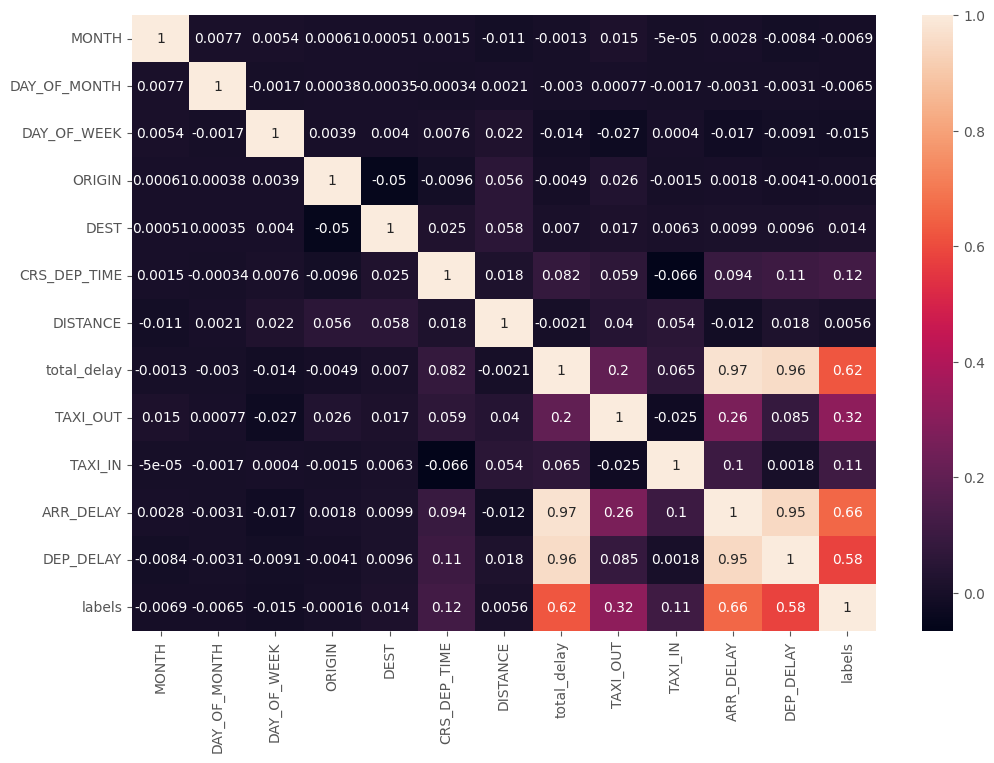

In [38]:
plt.figure(figsize=(12,8))
sns.heatmap(Z.corr(), annot=True)

In [39]:
df.reset_index(drop=True)

,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,total_delay,labels,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,Origin mean delay,Origin Dep delay,Origin TaxiOut,Origin Arr delay,Dest Arr delay,Dest TaxiOut,Dest Dep delay,Dest mean delay
0,2017-01-01,3,49,40,2000,2002.0,2.0,11.0,2013.0,2309.0,3.0,2324,2312.0,-12.0,0.0,0,0.0,144.0,130.0,116.0,966.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,6,12.248502,12.412422,18.428131,4.420822,3.556279,19.805337,11.663515,12.198633
1,2017-01-01,10,10,49,540,542.0,2.0,13.0,555.0,752.0,5.0,806,757.0,-9.0,0.0,0,0.0,146.0,135.0,117.0,657.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,6,16.947545,15.287593,16.811302,8.598825,0.946280,16.540572,8.008278,10.084623
2,2017-01-01,12,28,58,1905,1922.0,17.0,16.0,1938.0,2052.0,8.0,2035,2100.0,25.0,0.0,0,0.0,150.0,158.0,134.0,862.0,17.0,0.0,8.0,0.0,0.0,25.0,1.0,1,1,6,10.738913,9.278119,16.439017,2.168539,4.871385,19.083339,11.395175,12.802276
3,2017-01-01,14,47,36,1620,1625.0,5.0,16.0,1641.0,624.0,19.0,649,643.0,-6.0,0.0,0,0.0,569.0,558.0,523.0,4962.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,6,9.625338,9.568036,18.728186,-1.466847,9.098134,18.503123,16.447542,17.859444
4,2017-01-01,15,36,47,845,914.0,29.0,21.0,935.0,1533.0,6.0,1511,1539.0,28.0,0.0,0,0.0,686.0,685.0,658.0,4962.0,28.0,0.0,0.0,0.0,0.0,28.0,1.0,1,1,6,16.049259,15.910823,22.036949,6.995681,6.569990,19.930601,16.985014,14.503995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2243926,2016-12-31,1010,85,102,635,653.0,18.0,9.0,702.0,736.0,4.0,744,740.0,-4.0,0.0,0,0.0,129.0,107.0,94.0,651.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,31,5,9.034706,6.560781,13.400661,-1.414943,6.648288,18.180923,14.266791,15.484598
2243927,2016-12-31,1013,110,102,655,649.0,-6.0,10.0,659.0,858.0,8.0,935,906.0,-29.0,0.0,0,0.0,280.0,257.0,239.0,1735.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,31,5,14.912738,14.182548,13.998495,7.145938,6.648288,18.180923,14.266791,15.484598
2243928,2016-12-31,1023,80,59,1920,1922.0,2.0,10.0,1932.0,2202.0,5.0,2227,2207.0,-20.0,0.0,0,0.0,127.0,105.0,90.0,733.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,31,5,14.982381,14.484882,21.086246,7.549994,9.109767,20.495293,17.125069,17.903436
2243929,2016-12-31,1024,113,36,1210,1205.0,-5.0,12.0,1217.0,1422.0,9.0,1450,1431.0,-19.0,0.0,0,0.0,160.0,146.0,125.0,997.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,31,5,11.015712,8.246158,13.816079,1.907027,9.098134,18.503123,16.447542,17.859444


In [40]:
X = df[['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'DISTANCE', 'Origin Dep delay', 'Origin TaxiOut', 'Origin Arr delay', 'Dest Dep delay', 'Dest TaxiOut', 'Dest Arr delay']]
y = df['labels']

# Split Data

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Standardize

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier(random_state=42, n_estimators=30)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

: 

: 

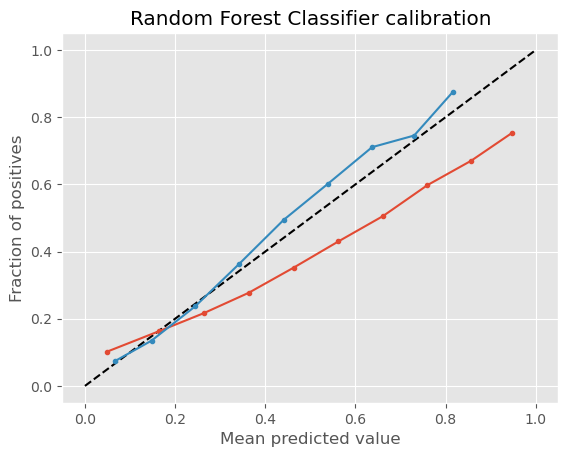

In [28]:
from sklearn.calibration import calibration_curve
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier(random_state=42, n_estimators=30, criterion='gini', max_depth=None, min_samples_split=10, min_samples_leaf=5, min_weight_fraction_leaf=0.0, max_features='sqrt',\
                              max_leaf_nodes=None, min_impurity_decrease=0.0, \
                             bootstrap=True, oob_score=False, n_jobs=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

param_grid = {
    'max_depth': [20],
    'min_samples_split': [10],
    'min_samples_leaf': [4]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=None)
grid_search.fit(X_train, y_train)
best_clf = grid_search.best_estimator_

clf.fit(X_train, y_train)

y_predicted = clf.predict_proba(X_test)[:, 1]
y_pred = grid_search.predict_proba(X_test)[:, 1]

fop_calibrated, mpv_calibrated = calibration_curve(y_test, y_pred, n_bins=10)
fop_uncalibrated, mpv_uncalibrated = calibration_curve(y_test, y_predicted, n_bins=10)

pyplot.plot([0, 1], [0, 1], linestyle='--', color='black')

# plot model reliabilities
pyplot.plot(mpv_uncalibrated, fop_uncalibrated, marker='.', label='Uncalibrated')
pyplot.plot(mpv_calibrated, fop_calibrated, marker='.', label='Calibrated')
pyplot.title('Random Forest Classifier calibration')
pyplot.xlabel('Mean predicted value')
pyplot.ylabel('Fraction of positives')

pyplot.show()

In [29]:
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.99      0.90    365799
         1.0       0.63      0.04      0.08     82988

    accuracy                           0.82    448787
   macro avg       0.72      0.52      0.49    448787
weighted avg       0.78      0.82      0.75    448787



# Gradient Boosting Classifier

In [85]:
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.calibration import calibration_curve
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV

clf = xgb.XGBClassifier(n_estimators=500, learning_rate = 0.1, 
                        max_depth = 10, random_state=42)

param_grid = {
    'max_depth': [40],
    'min_child_weight': [20],
    'gamma': [0]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=None)
grid_search.fit(X_train, y_train)
best_clf = grid_search.best_estimator_

clf.fit(X_train, y_train)

y_predicted = clf.predict_proba(X_test)[:, 1]
y_pred = grid_search.predict_proba(X_test)[:, 1]

fop_calibrated, mpv_calibrated = calibration_curve(y_test, y_pred, n_bins=10)
fop_uncalibrated, mpv_uncalibrated = calibration_curve(y_test, y_predicted, n_bins=10)

pyplot.plot([0, 1], [0, 1], linestyle='--', color='black')

# plot model reliabilities
pyplot.plot(mpv_uncalibrated, fop_uncalibrated, marker='.', label='Uncalibrated')
pyplot.plot(mpv_calibrated, fop_calibrated, marker='.', label='Calibrated')
pyplot.title('XGBoost calibration')
pyplot.xlabel('Mean predicted value')
pyplot.ylabel('Fraction of positives')

pyplot.show()


: 

: 

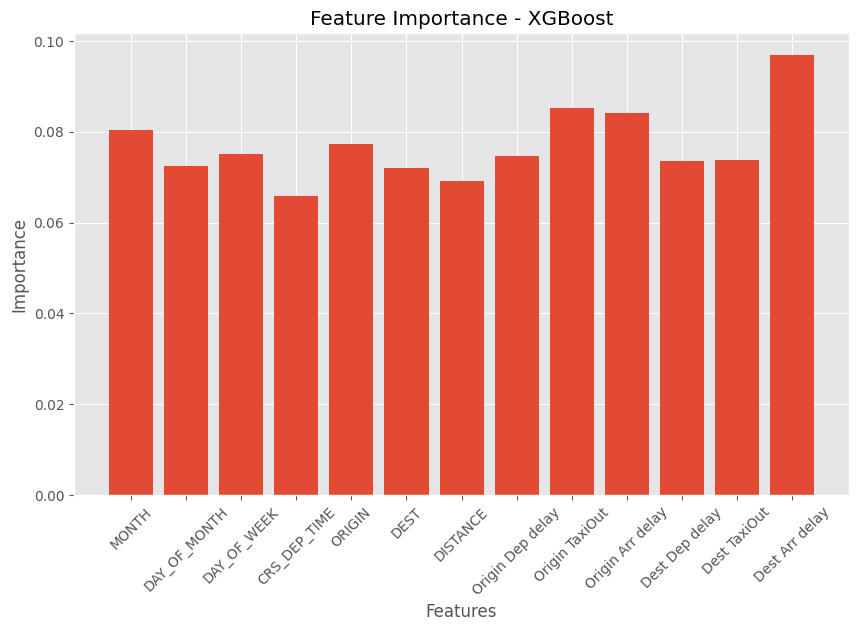

In [45]:
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.calibration import calibration_curve
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV
    
clf = xgb.XGBClassifier(n_estimators=2000, learning_rate = 0.1, 
                        max_depth = 20, random_state=42, min_child_weight=10, max_delta_step=10)

clf.fit(X_train, y_train)

feature_importance = clf.feature_importances_

# Tạo bar chart
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importance)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance - XGBoost')
plt.show()

In [46]:
y_predicted = clf.predict(X_test)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90    365799
         1.0       0.55      0.28      0.37     82988

    accuracy                           0.82    448787
   macro avg       0.70      0.62      0.64    448787
weighted avg       0.80      0.82      0.80    448787



In [84]:
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90    365799
         1.0       0.58      0.26      0.36     82988

    accuracy                           0.83    448787
   macro avg       0.72      0.61      0.63    448787
weighted avg       0.80      0.83      0.80    448787



# Gradient Boosting Classifier

### Kflod = 5

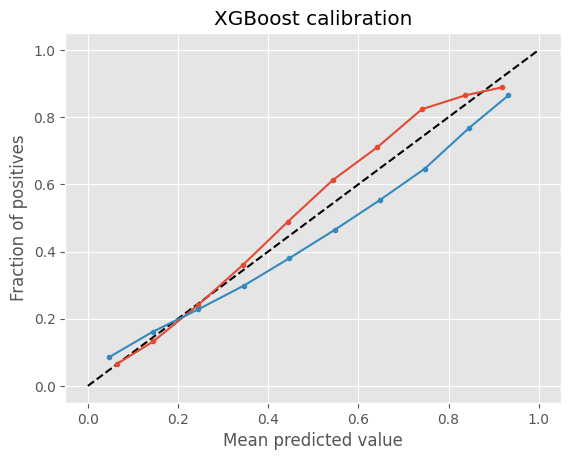

In [34]:
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.calibration import calibration_curve
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV

clf = xgb.XGBClassifier(n_estimators=500, learning_rate = 0.1, 
                        max_depth = 10, random_state=37)

param_grid = {
    'max_depth': [40],
    'min_child_weight': [20],
    'gamma': [0]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)
best_clf = grid_search.best_estimator_

clf.fit(X_train, y_train)

y_predicted = clf.predict_proba(X_test)[:, 1]
y_pred = grid_search.predict_proba(X_test)[:, 1]

fop_calibrated, mpv_calibrated = calibration_curve(y_test, y_pred, n_bins=10)
fop_uncalibrated, mpv_uncalibrated = calibration_curve(y_test, y_predicted, n_bins=10)

pyplot.plot([0, 1], [0, 1], linestyle='--', color='black')

# plot model reliabilities
pyplot.plot(mpv_uncalibrated, fop_uncalibrated, marker='.', label='Uncalibrated')
pyplot.plot(mpv_calibrated, fop_calibrated, marker='.', label='Calibrated')
pyplot.title('XGBoost calibration')
pyplot.xlabel('Mean predicted value')
pyplot.ylabel('Fraction of positives')

pyplot.show()


In [35]:
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90    365799
         1.0       0.58      0.26      0.36     82988

    accuracy                           0.83    448787
   macro avg       0.72      0.61      0.63    448787
weighted avg       0.80      0.83      0.80    448787



# Decision Tree Classifier

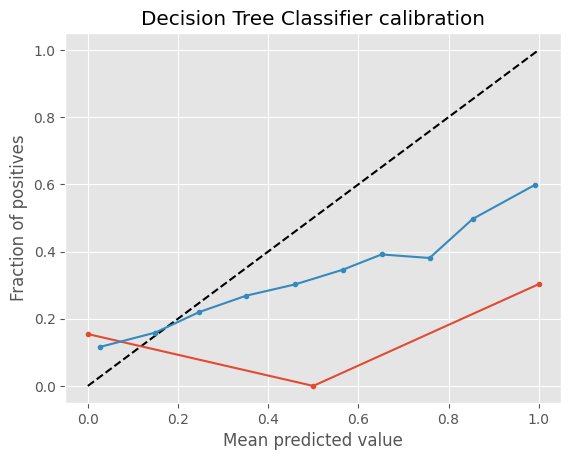

In [28]:
from sklearn.calibration import calibration_curve
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [20],
    'min_samples_split': [10],
    'min_samples_leaf': [4]
}
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=None)
grid_search.fit(X_train, y_train)
best_clf = grid_search.best_estimator_

clf.fit(X_train, y_train)

y_predicted = clf.predict_proba(X_test)[:, 1]
y_pred = grid_search.predict_proba(X_test)[:, 1]

fop_calibrated, mpv_calibrated = calibration_curve(y_test, y_pred, n_bins=10)
fop_uncalibrated, mpv_uncalibrated = calibration_curve(y_test, y_predicted, n_bins=10)

pyplot.plot([0, 1], [0, 1], linestyle='--', color='black')

# plot model reliabilities
pyplot.plot(mpv_uncalibrated, fop_uncalibrated, marker='.', label='Uncalibrated')
pyplot.plot(mpv_calibrated, fop_calibrated, marker='.', label='Calibrated')
pyplot.title('Decision Tree Classifier calibration')
pyplot.xlabel('Mean predicted value')
pyplot.ylabel('Fraction of positives')

pyplot.show()

In [29]:
from sklearn.metrics import classification_report

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89    365799
         1.0       0.42      0.17      0.24     82988

    accuracy                           0.80    448787
   macro avg       0.63      0.56      0.56    448787
weighted avg       0.76      0.80      0.77    448787



In [31]:
y_predicted = clf.predict(X_test)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       0.85      0.82      0.83    365799
         1.0       0.30      0.34      0.32     82988

    accuracy                           0.73    448787
   macro avg       0.57      0.58      0.58    448787
weighted avg       0.75      0.73      0.74    448787



In [2]:
from sklearn.calibration import calibration_curve
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn.metrics import classification_report

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

NameError: name 'X_train' is not defined